In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [2]:
demand_loc = mdates.DayLocator(interval=7)
demand_fmt = mdates.DateFormatter('%Y-%m-%d')

In [14]:
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/train_data_covid_15days_component.csv', parse_dates=['date'])

In [15]:
df.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,LocalLinearTrend,Dynamic,full_time_coefficients,completely_coefficients,Restaurant_coefficients,Retail_coefficients
0,1,2019-01-01,66469.0,9.468750,9125.0,248253.0,204042,331752.0,535794.0,66906.852405,-406.044882,0.186405,-0.014792,-0.089370,0.059684
1,2,2019-01-02,74406.0,9.537083,27026.0,234253.0,273913,511654.0,785567.0,66844.873862,7590.447948,0.185374,-0.014277,-0.090728,0.060151
2,3,2019-01-03,74665.0,11.833333,22748.0,221879.0,289507,534533.0,824040.0,66818.368551,7824.096845,0.186538,-0.009095,-0.092085,0.060348
3,4,2019-01-04,75629.0,12.400833,20670.0,214436.0,319713,584087.0,903800.0,66764.109494,8835.474585,0.180992,-0.006052,-0.090546,0.060506
4,5,2019-01-05,71496.0,11.505833,11053.0,254624.0,278203,496885.0,775088.0,66679.550724,4759.587258,0.181057,-0.007830,-0.090179,0.060054


In [31]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]


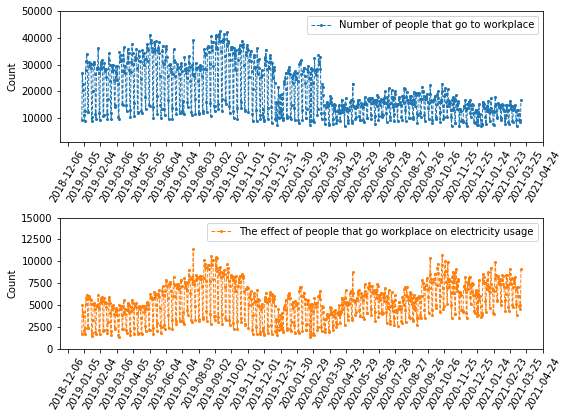

In [21]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['full_time_work_behavior_devices'], lw=1, label="Number of people that go to workplace", c=c1,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['full_time_coefficients']*df['full_time_work_behavior_devices'], lw=1, label="The effect of people that go workplace on electricity usage", c=c2,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 15000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

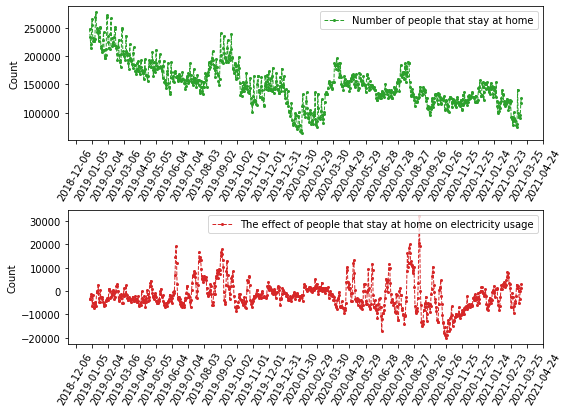

In [23]:
#colors = sns.color_palette()
#c1, c2, c3, c4, c5, c6 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['completely_home_device_count'], lw=1, label="Number of people that stay at home", c=c3,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['completely_home_device_count']*df['completely_coefficients'], lw=1, label="The effect of people that stay at home on electricity usage", c=c4,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([-900, 9000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

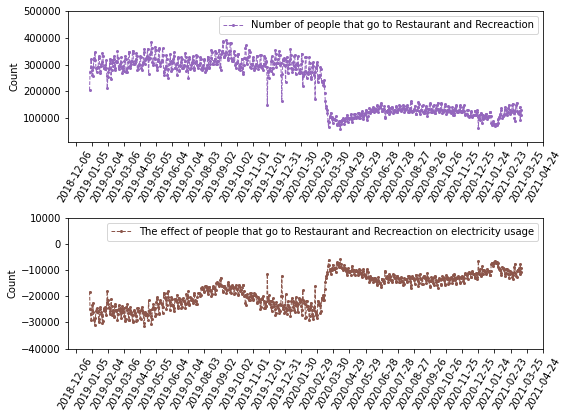

In [30]:

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Restaurant_Recreaction'], lw=1, label="Number of people that go to Restaurant and Recreaction", c=c5,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([10000, 500000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Restaurant_Recreaction']*df['Restaurant_coefficients'], lw=1, label="The effect of people that go to Restaurant and Recreaction on electricity usage", c=c6,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-40000, 10000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

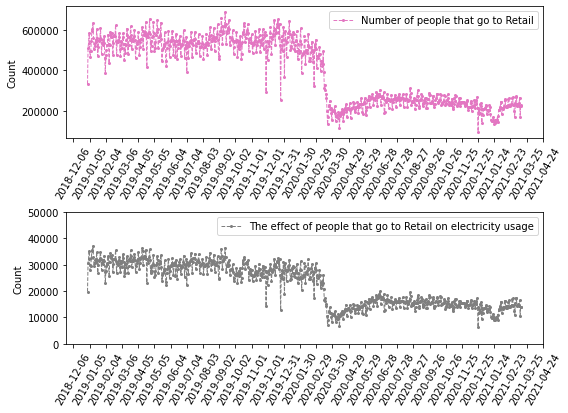

In [34]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Retail'], lw=1, label="Number of people that go to Retail", c=c7,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Retail']*df['Retail_coefficients'], lw=1, label="The effect of people that go to Retail on electricity usage", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 50000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()